In [14]:
from google.colab import drive
drive.mount("/content/drive")
# @title Mount Drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
%%capture

import os 
import requests

dest_folder = '/content/drive/MyDrive/reproduce_Momi_et_al_2022/'
if not os.path.exists(dest_folder):
  os.makedirs(dest_folder)  # create folder if it does not exist

os.chdir(dest_folder)

#!gdown url
os.chdir(dest_folder)
!gdown --folder 'https://drive.google.com/drive/folders/1iwsxrmu_rnDCvKNYDwTskkCNt709MPuF' --remaining-ok # for folders

# @title download data


In [16]:
%%capture

!git clone https://github.com/GriffithsLab/PyTepFit

# @title Clone PyTepFit 


In [17]:
%%capture
dest_folder = '/content/drive/MyDrive/reproduce_Momi_et_al_2022/fsaverage'
if not os.path.exists(dest_folder):
  os.makedirs(dest_folder)  # create folder if it does not exist

os.chdir(dest_folder)

!gdown --folder 'https://drive.google.com/drive/folders/12fOB4rYuuZFPT8m2EKkZ5HwSUhrN18Kg' --remaining-ok # for folders
!gdown --folder 'https://drive.google.com/drive/folders/12EfvXzJHeEEx0BeMgoU8P6CRciwbbfs9' --remaining-ok # for folders
!gdown --folder 'https://drive.google.com/drive/folders/12-693pxIwFJOkVwf37DTpdolrX9tHIfG' --remaining-ok # for folders
!gdown --folder 'https://drive.google.com/drive/folders/11XVJGyy5wg_FPllb7BUbYB4l3nrk7UZ7' --remaining-ok # for folders
!gdown --folder 'https://drive.google.com/drive/folders/101-_ocQjnjqMdhp5uugJIOKEYcpWYoKn' --remaining-ok # for folders
!gdown --folder 'https://drive.google.com/drive/folders/1-t_qp9cZoxGTxx0xuhXt2XSJ8Tnm-yf5' --remaining-ok # for folders

!gdown --id '1-tCdXGwskGlo-AoHOGBxNH8CJ7c1uoVD' --remaining-ok # for folders
!gdown --id '1-s73J0omtVL2RD0AVV0Xg3IYtcLvIxcp' --remaining-ok # for folders
!gdown --id '1-rZ2R4a4F-OHtsWHbEwBh_8PLOYekqZ-' --remaining-ok # for folders
!gdown --id '1-rBLNpT_6877nTI1dYdjnkOLi0ZjFGS_' --remaining-ok # for folders

# @title fsaverage dir 

In [18]:
%%capture
!pip install mne

# @title Install dependencies

In [19]:
#%config Completer.use_jedi = False

import torch
import pickle
import numpy as np 
import glob
import re
import os
import matplotlib.pyplot as plt
import scipy, sklearn
from sklearn.cluster import KMeans
import seaborn as sns
from scipy import io
import mne
import pandas as pd
import time
os.chdir('/content/drive/MyDrive/reproduce_Momi_et_al_2022/PyTepFit/tepfit/')
from fit import ParamsJR, Model_fitting, RNNJANSEN, Costs, OutputNM

# @title Importage

In [22]:
%%capture

dest_folder = '/content/drive/MyDrive/reproduce_Momi_et_al_2022/'
os.chdir(dest_folder)

!gdown --id '1Bs_ynEtiGYa9G505jDGx9VnSdH2zaOab' --remaining-ok #Connectome weights
!gdown --id '1BOf-IMN2TcAy1RCjjM220chmU-9a6Bvm' --remaining-ok #only high trial
!gdown --id '13VmsD8fQrspZefaHYfhWzdWStF4qM_l7' --remaining-ok #Connectome Distance 
!gdown --id '1tlfW7b0eEk3q7aTtMOShG6fCD5fhq_YP' --remaining-ok #Leadfield
!gdown --id '1_yDnpb3_kkejFaJ8u3KQuSFI82jF5zyS' --remaining-ok #Ts label corrected
!gdown --id '1K9Ip4gMvgjtX4IyTC2EVfGVn-ztyuhbD' --remaining-ok #Real_EEG



In [20]:
#%config Completer.use_jedi = False
os.chdir('/content/drive/MyDrive/reproduce_Momi_et_al_2022/PyTepFit/')
import torch
import pickle
import numpy as np 
import glob
import re
import os
import matplotlib.pyplot as plt
import scipy, sklearn
from sklearn.cluster import KMeans
import seaborn as sns
from scipy import io
import mne
import pandas as pd
import time
import tepfit
from fit import ParamsJR, Model_fitting, RNNJANSEN

# @title Importage

In [1]:
"""os.chdir('/content/drive/MyDrive/tepfit')
import tepfit.fit as tepfit_fit
from tepfit.fit import RNNJANSEN
from tepfit.fit import ParamsJR
from tepfit.fit import OutputJR
from tepfit.fit import Model_fitting
from torch.nn.parameter import Parameter


del Model_fitting
del tepfit_fit
del RNNJANSEN
del ParamsJR
del OutputJR"""


# Pytorch stuff


"""
Importage
"""

#from Model_pytorch import wwd_model_pytorch_new
import matplotlib.pyplot as plt # for plotting
import numpy as np # for numerical operations
import pandas as pd # for data manipulation
import seaborn as sns # for plotting 
import time # for timer
import torch
import torch.optim as optim
from sklearn.metrics.pairwise import cosine_similarity
import pickle

from torch.nn.parameter import Parameter


In [23]:
sc_file = '/content/drive/MyDrive/TORONTO/EEG//Schaefer2018_200Parcels_7Networks_count.csv'
high_file ='/content/drive/MyDrive/TORONTO/EEG/only_high_trial.mat'
dist_file = '/content/drive/MyDrive/TORONTO/EEG//Schaefer2018_200Parcels_7Networks_distance.csv'
file_eeg = '/content/drive/MyDrive//TORONTO/EEG/label_ts_corrected'
file_leadfield = '/content/drive/MyDrive/TORONTO/EEG/leadfield'
file_eeg = '/content/drive/MyDrive/TORONTO/EEG/real_EEG'
eeg =np.load(file_eeg, allow_pickle=True)
eeg

array([[-0.04882562, -0.01855596,  0.0080311 , ...,  0.06746994,
         0.07579786,  0.0950077 ],
       [-0.05753722, -0.04972065, -0.05058948, ...,  0.12024794,
         0.10780556,  0.09364477],
       [-0.04663963, -0.02801384, -0.01127495, ...,  0.07189867,
         0.07543082,  0.08844396],
       ...,
       [ 0.11301994,  0.13689921,  0.15957486, ..., -0.07983613,
        -0.08232486, -0.09218773],
       [ 0.05367654,  0.01649795, -0.01004933, ...,  0.05334642,
         0.02660085, -0.00436937],
       [ 0.01670002, -0.01413833, -0.03701906, ...,  0.04310367,
         0.02319151,  0.0047153 ]])

In [24]:
lm = np.load(file_leadfield, allow_pickle=True)
print(lm.max(), lm.min())

268.31223 -125.81516


In [25]:
data_high = scipy.io.loadmat(high_file)

In [26]:
data_high['only_high_trial'].shape

(20, 62, 2000)

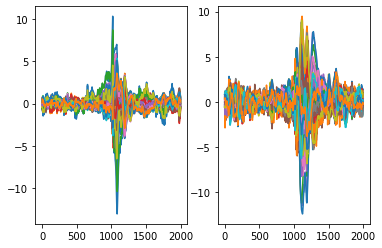

In [27]:

fig, ax = plt.subplots(1,2)
ax[0].plot(data_high['only_high_trial'][0].T)
ax[1].plot(data_high['only_high_trial'][6].T)
plt.show()

In [28]:
sc_df = pd.read_csv(sc_file, header=None, sep=' ')
sc = sc_df.values
dist_df = pd.read_csv(dist_file, header=None, sep=' ')
dist = dist_df.values

In [29]:
sc = 0.5*(sc+sc.T)
sc =np.log1p(sc)/np.linalg.norm(np.log1p(sc))

In [30]:
stim_weights_file = '/content/drive/MyDrive/TORONTO/EEG/stim_weights.npy'
stim_weights = np.load(stim_weights_file)

In [31]:
ki0 =stim_weights[:,np.newaxis]

In [32]:
gm_file ='/content/drive/MyDrive/TORONTO/EEG/GMFA.npy'
gm = np.load(gm_file)

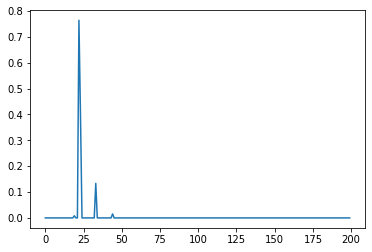

In [33]:
plt.plot(ki0)

sub:  0
epoch:  0 -3188.8367
epoch:  0 0.43244531568492395 cos_sim:  0.11795605650525359
epoch:  1 -6393.2554
epoch:  1 0.411749272623987 cos_sim:  0.03001698942862926
epoch:  2 -9189.017
epoch:  2 0.39830660563879383 cos_sim:  0.04837571256815108
epoch:  3 -11011.923
epoch:  3 0.4111763859185578 cos_sim:  0.057726650653889
epoch:  4 -12701.181
epoch:  4 0.42425572973486103 cos_sim:  0.0742314762046428
epoch:  5 -13974.889
epoch:  5 0.44714909085039106 cos_sim:  0.09243297368687242
epoch:  6 -15065.895
epoch:  6 0.4747003645013756 cos_sim:  0.11359817826552863
epoch:  7 -16031.479
epoch:  7 0.5212858656261586 cos_sim:  0.13367196691976446
epoch:  8 -16889.098
epoch:  8 0.5612241938489739 cos_sim:  0.15368831770527921
epoch:  9 -17660.756
epoch:  9 0.5976144726470293 cos_sim:  0.1774267074828247
epoch:  10 -18364.092
epoch:  10 0.6266809294224387 cos_sim:  0.2005184513441831
epoch:  11 -19011.672
epoch:  11 0.6416063242525543 cos_sim:  0.2256408292528069
epoch:  12 -19612.305
epoch:  12

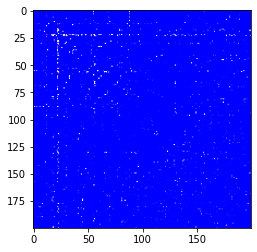

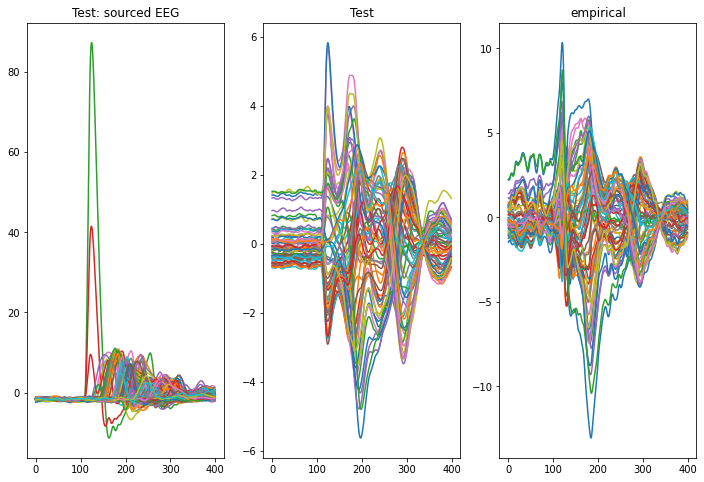

running time is  1521.3761403560638 's


In [ ]:
start_time = time.time()
node_size = stim_weights.shape[0]
output_size = gm.shape[0]
batch_size = 50
step_size = 0.0001
input_size = 3
num_epoches = 120
tr = 0.001
state_size =6
base_batch_num = 20

lm_v = np.zeros((output_size,node_size))

#['gm']:#[0, 1,2,3,5,6,7,8,9,10, 12,13,14,15,16,17,18]:#
#for i in range(data_high['only_high_trial'].shape[0]):
for i in range(1):
    print('sub: ', i)
    data_mean = [data_high['only_high_trial'][i]]*num_epoches
    #data_mean = [gm]*num_epoches
    data_mean =np.array(data_mean)
    file_leadfield = '/content/drive/MyDrive/EEG/leadfield_from_mne/sub'+ str(i+1).zfill(3)+'/leadfield.npy'
    lm = np.load(file_leadfield, allow_pickle=True)

    par = ParamsJR('JR', A = [3.25, 0], a= [100, 0.5], B = [22, 0], b = [50, 1], g=[1000, .1], \
                    c1 = [135, 0.2], c2 = [135*0.8, 0.4], c3 = [135*0.25, 0.8], c4 = [135*0.25, 0.8],\
                    std_in=[100, 10], vmax= [5, 0], v0=[6,0], r=[0.56, 0], y0=[2 * np.ones((output_size, 1)), 2 * np.ones((output_size, 1))],\
                    mu = [1., 2.5], k = [10, .3], cy0 = [5, 0], ki=[ki0, 0], lm=[lm, 1.0 * np.ones((output_size, node_size))+lm_v]
                   ,w_bb=[sc, 50 * np.ones((node_size, node_size))])
    
    model = RNNJANSEN(input_size, node_size, batch_size, step_size, output_size, tr, sc, lm, dist, True, False, par)

    # call model fit method
    F = Model_fitting(model, data_mean[:,:,900:1300], num_epoches, 0)

    # fit data(train)
    u = np.zeros((node_size,10,400))
    u[:,:,110:120]= 1000
    output_train = F.train(u=u)
    
    u = np.zeros((node_size,10,400))
    u[:,:,110:120]= 1000
    X0 = np.random.uniform(0, 5, (node_size, state_size))
    hE0 = np.random.uniform(0, 5, (node_size, 500))
    
    output_test = F.test(X0, hE0, base_batch_num, u=u)

    sc_mod = np.zeros((200,200))
    mask = np.tril_indices(200,-1)


    sc_mod[mask] = F.output_sim.weights[-10:,:].mean(0)
    sc_mod = sc_mod+sc_mod.T 
    fig, ax = plt.subplots(1, 1, figsize=(5, 4))

    ax.imshow(np.log1p(sc_mod), cmap = 'bwr')
    plt.show()

    filename = '/content/drive/MyDrive/EEG/reproduce_fig/sub_'+str(i)+'_fittingresults_stim_exp.pkl'
    with open(filename, 'wb') as f:
        pickle.dump(F, f) 
    
    outfilename = '/content/drive/MyDrive/EEG/reproduce_fig/sub_'+str(i)+'_simEEG_stim_exp.pkl'
    

    with open(outfilename, 'wb') as f:
        pickle.dump(F.output_sim, f)
    
    fig, ax = plt.subplots(1,3, figsize=(12,8))
    ax[0].plot((F.output_sim.E_test-F.output_sim.I_test).T)
    ax[0].set_title('Test: sourced EEG')
    ax[1].plot(F.output_sim.eeg_test.T)
    ax[1].set_title('Test')
    ax[2].plot(data_high['only_high_trial'][i].T[900:1300,:])
    ax[2].set_title('empirical')
    plt.show()
end_time =  time.time()
print('running time is  {0} \'s'.format(end_time - start_time ))

In [ ]:
files_dir =  '/content/drive/MyDrive/EEG'

pck_files = sorted(glob.glob(files_dir + '/*_fittingresults_stim_exp.pkl'))
pck_files.pop()
pck_files.sort(key=lambda var:[int(x) if x.isdigit() else x for x in re.findall(r'[^0-9]|[0-9]+', var)])

# @title test data

In [ ]:
sbj = 0 

with open(pck_files[sbj], 'rb') as f:
    data = pickle.load(f)


In [ ]:
scipy(F.output_sim.eeg_test, data.output_sim.eeg_test)

(800, 800)

In [ ]:
np.diag(cosine_similarity(F.output_sim.eeg_test, data.output_sim.eeg_test)).mean()

0.9845252

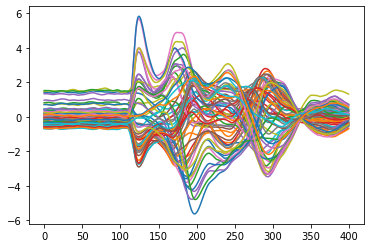

In [ ]:
plt.plot(F.output_sim.eeg_test.T);

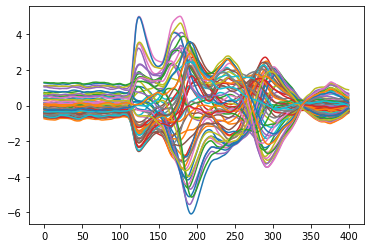

In [ ]:
plt.plot(data.output_sim.eeg_test.T);